In [26]:
import numpy as np
import matplotlib.pyplot as plt

import dsphsim.tactician
import dsphsim.simulator
import dsphsim.instruments
import dsphsim.dwarf
from astropy import table
from start_plot import *

%matplotlib inline
    

In [47]:
def numcal(mw, th, depth):
    num = np.zeros_like(mw['Mstar'])
    for i in range(1, len(num)):
        distance = mw[i]['distance'] # in kpc
        stellar_mass = mw[i]['Mstar'] # in Msun
        dm = 5*np.log10(distance*1000)-5
        dwarf = dsphsim.dwarf.Dwarf(distance_modulus = dm, \
                                    age = 12.0, metallicity = 2e-4, \
                                    richness = stellar_mass/unit_stellar_mass)
        mag_1, mag_2, lon, lat, vel = dwarf.simulate()
        mags = mag_1
        num[i] = len(mags[mags < depth])
    return num


In [91]:
mw = table.Table.read('/Users/astrolab/Dropbox/LSST/mwish_tabs/mwish_2.ecsv',format = 'ascii.ecsv')
mw = mw[mw['Mstar'] < 1e6] # only consider low mass dwarfs, Mstar < 1e6 Msun

dwarf0 = dsphsim.dwarf.Dwarf(age = 12.0, metallicity = 2e-4)
unit_stellar_mass = dwarf0.isochrone.stellar_mass()
#print 'index, distance module, stellar mass, number of star'

th = 50 # threshold = 50 for detectability

deptharray = np.arange(22,27.1,1)
numarray = np.zeros([len(deptharray),len(mw['Mstar'])])

for i in range(len(deptharray)):
    numarray[i,:] = numcal(mw, th, deptharray[i])


Assuming that the dwarf is detectable if there are 50 stars bright than the survey depth


In [104]:
print "Assuming that the dwarf is detectable if there are %i stars bright than the survey depth" %th

print 'total number of dwarfs with Mstar < 10^6 Msun: %i' %len(num) 
for i in range(len(deptharray)):
    print '# of dwarfs detectable with survey depth = %3i mag : %4i' %(deptharray[i], sum(numarray[i] > th))

print 'Assuming the survey covers all 4pi sky'

Assuming that the dwarf is detectable if there are 50 stars bright than the survey depth
total number of dwarfs with Mstar < 10^6 Msun: 315
# of dwarfs detectable with survey depth =  22 mag :   42
# of dwarfs detectable with survey depth =  23 mag :   61
# of dwarfs detectable with survey depth =  24 mag :   87
# of dwarfs detectable with survey depth =  25 mag :  118
# of dwarfs detectable with survey depth =  26 mag :  177
# of dwarfs detectable with survey depth =  27 mag :  234
Assuming the survey covers all 4pi sky


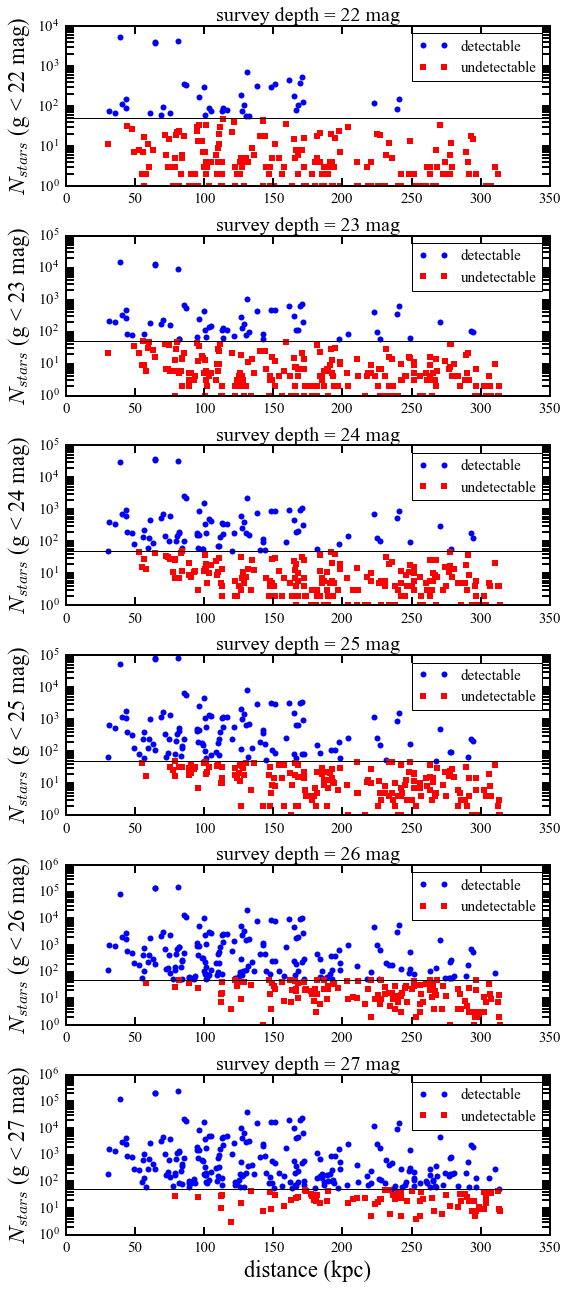

In [94]:
n = len(deptharray)

plt.figure(figsize=[8,3*n])
for k in range(n):
    plt.subplot(n,1,k+1)
    idx = numarray[k] > th
    plt.plot(mw['distance'][idx], numarray[k][idx],'o', mew=0, label='detectable')
    plt.plot(mw['distance'][np.invert(idx)], numarray[k][np.invert(idx)],'rs', mew=0, label='undetectable')
    plt.gca().set_yscale("log")
    plt.ylabel('$N_{stars}$ (g < %i mag)' %deptharray[k])
    plt.title('survey depth = %i mag' %deptharray[k], fontsize = 20)
    plt.axhline(50,color='k')
    plt.legend()
plt.xlabel('distance (kpc)')
plt.tight_layout()
plt.show()

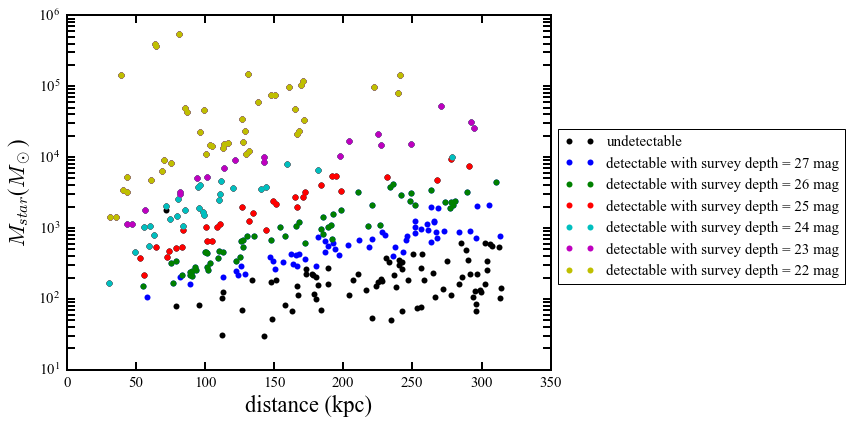

In [95]:
plt.figure(figsize=[8,6])
idx = numarray[n-1] > th 
plt.plot(mw['distance'][np.invert(idx)], mw['Mstar'][np.invert(idx)],'ko',mew=0, label='undetectable')

for k in range(n):
    idx = numarray[n-1-k] > th
    plt.plot(mw['distance'][idx], mw['Mstar'][idx],'o', mew=0, label='detectable with survey depth = %i mag'%deptharray[n-1-k])    
plt.gca().set_yscale("log")
plt.xlabel('distance (kpc)')
plt.ylabel('$M_{star}$($M_\odot$)')
plt.legend(loc='left center', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.ylim(10,1e6)
plt.show()

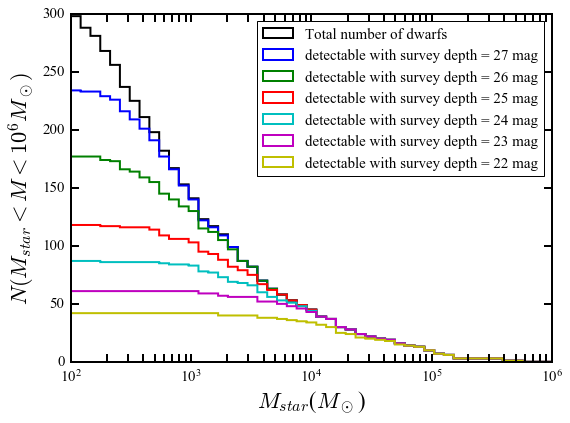

In [102]:
plt.figure(figsize=[8,6])
allmw = table.Table.read('/Users/astrolab/Dropbox/LSST/mwish_tabs/mwish_2.ecsv',format = 'ascii.ecsv')
plt.hist(mw['Mstar'],bins=np.logspace(2, 6, 50), cumulative=-1,histtype='step',color='k',lw=2,label='Total number of dwarfs')

for k in range(n):
    idx = numarray[n-1-k] > th
    plt.hist(mw['Mstar'][idx],bins=np.logspace(2, 6, 50), cumulative=-1,histtype='step',lw=2, label='detectable with survey depth = %i mag'%deptharray[n-1-k])

plt.gca().set_xscale("log")
plt.xlabel('$M_{star}$($M_\odot$)')
plt.ylabel('$N(M_{star} < M < 10^6M_\odot)$')
plt.legend()
plt.tight_layout()
plt.show()